# Tutorial: OpenCV

Laden der notwendigen Bibliotheken
- OpenCV: `cv2`: Programmierbibliothek für Computer Vision
- NumPy: `numpy`: Bibliothek für numerische Berechnungen
- Matplotlib: `matplotlib.pyplot`: Bibliothek für Datenvisualisierung

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Laden des Bildes
- Verwenden von `cv2.imread()`, um ein Bild von einem angegebenen Pfad zu laden
- Beispielpfad: `'path/to/your/image.jpg'`


Ausgabe der Bild-Dimensionen und des Bildes
- Verwenden von `img.shape`, um die Dimensionen des geladenen Bildes zu erhalten
- Verwenden von `cv2.imshow()`, um das Bild anzuzeigen

(1000, 1500, 3)


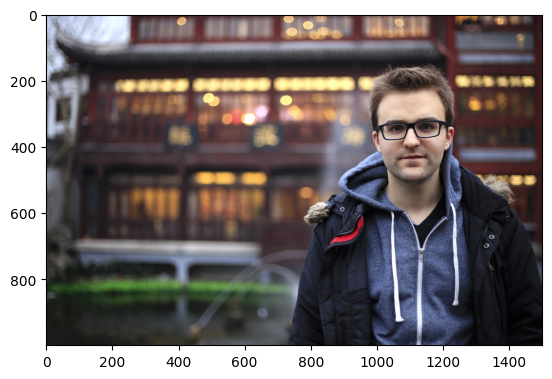

In [100]:
img = cv2.imread('bild.jpg', )

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.imshow(image)
plt.show()

Ausgabe des Bildes im Graustufen


(1000, 1500)


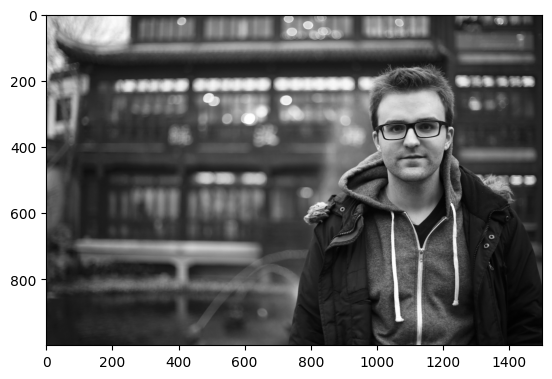

In [101]:
grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(grey_image.shape)
plt.imshow(grey_image, 'gray')
plt.show()

Helligkeit verändern
- wie das Bild intern gespeichert wird (kompakt als unit8 Array mit Werten von 0-255)
- wie die Helligkeit vom Bild verändert werden kann (z.B. durch Addition eines Wertes zu jedem Pixel)

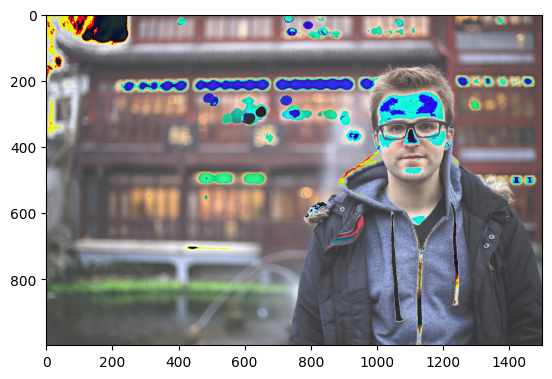

In [102]:
z = np.zeros(image.shape, dtype=np.uint8) + 50
increased_brightness = image + z
plt.imshow(increased_brightness)

Einfachere Erhöhung der Helligkeit mithilfe der OpenCV-Funktion `cv2.add()`
- Vermeidung von Überlaufproblemen durch die Verwendung von `cv2.add()`, die die Pixelwerte korrekt behandelt

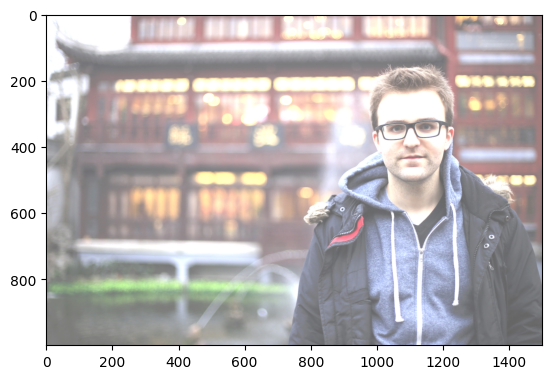

In [103]:
bright_image = cv2.add(image, 100)
plt.imshow(bright_image)

Rechteck einzeichnen
- Verwenden von `cv2.rectangle()`, um ein Rechteck auf dem Bild zu zeichnen
- Beispiel: `cv2.rectangle(image, (startX, startY), (endX, endY), color, thickness)`

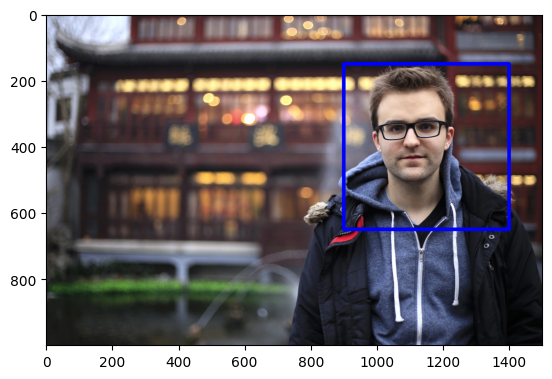

In [104]:
startX = 900
startY = 150
endX = startX + 500
endY = startY + 500
edgecolor = (0, 0, 255) # Blau in RGB
thickness = 10

cv2.rectangle(image, (startX, startY), (endX, endY), edgecolor, thickness)

plt.imshow(image)
plt.show()

Gesichtserkennung mit vortrainierten Modellen
- Erkennungs von Gesichtern in Bildern mithilfe von vortrainierten Klassifikatoren (Haar-Cascades)
- Laden des vortrainierten Modells mit `cv2.CascadeClassifier()`
- Parameter für die Gesichtserkennung anpassen (z.B. `scaleFactor`, `minNeighbors`, `minSize`)
- Erklärung der Parameter:

    a) `scaleFactor`: Gibt an, wie stark das Bild bei jeder Skalierung verkleinert wird. Ein Wert von 1.1 bedeutet, dass das Bild um 10% verkleinert wird.

    b) `minNeighbors`: Gibt an, wie viele Nachbarn ein Rechteck haben muss, um als Gesicht erkannt zu werden. Ein höherer Wert führt zu weniger Erkennungen, aber weniger Fehlalarmen.
    
    c) `minSize`: Gibt die minimale Größe der zu erkennenden Gesichter an. Kleinere Gesichter werden ignoriert.
    
- Einzeichnen der erkannten Gesichter
- Zeichnen von Rechtecken um die erkannten Gesichter im Bild

Es wurden 1 Gesichter gefunden
[[976 240 262 262]]


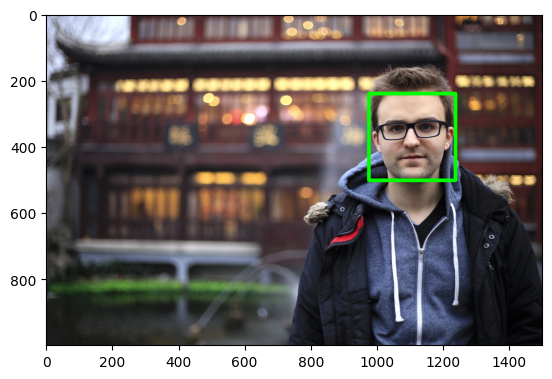

In [106]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Ensure the correct path to the Haar cascade XML file
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
# print(cascade_path)
classifier = cv2.CascadeClassifier(cascade_path)

# Perform face detection
faces = classifier.detectMultiScale(gray_image, minNeighbors=12)
print(f"Es wurden {len(faces)} Gesichter gefunden")
print(faces)

c = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(c, (x, y), (x + w, y + h), (0, 255, 0), 10)

i = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
plt.imshow(i)
plt.show()
